[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'^GSPC'}, xlabel='Date'>

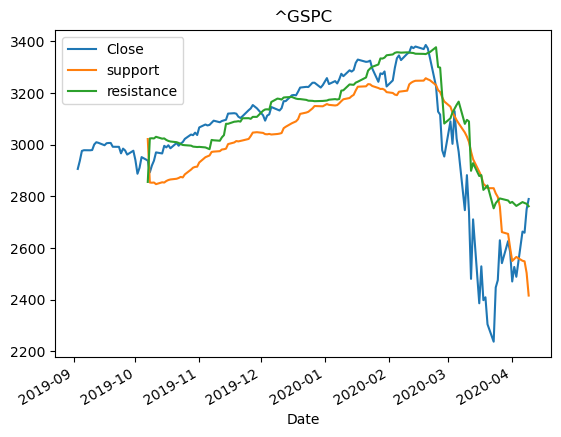

In [7]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas_ta as ta
from scipy.stats import entropy
import numpy as np
import math

def get_indicator(q, ind_name, params):
    ts = None
    if ind_name == "atr":
        ts = q.ta.atr(params['length'],fillna=0)
        
    return ts

window=25
ticker='^GSPC'
df=yf.download(tickers= ticker,start= '2019-9-01',end='2020-4-10', interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
df['atr'] = get_indicator(df, 'atr', {'length': window})
#df['rsi_ma'] =df['rsi'].rolling(window).mean()
df['zone']=df['atr']*math.sqrt(window)
df['hi']=df['High'].rolling(window).max()
df['lo']=df['Low'].rolling(window).min()
df['resistance']=df['lo']+df['zone']
df['support']=df['hi']-df['zone']


df[['Close','support','resistance']].plot(title=ticker)